In [1]:
import numpy as np
from pymatgen.core import Structure
from megnet.models import MEGNetModel
from megnet.data.crystal import CrystalGraph
import json

2024-01-01 15:28:39.898243: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-01 15:28:39.945654: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-01 15:28:39.945691: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-01 15:28:39.946878: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-01 15:28:39.954048: I tensorflow/core/platform/cpu_feature_guar

In [2]:
# 对real直接拟合

# 训练集拟合

In [3]:
with open("/root/home/jupyter/JupyterLab/bandgap-train/json/predicition_results_megnetGapTrain.json", "r") as f:
    data_train1 = json.load(f)

In [4]:
len(data_train1)

90

In [5]:
structures_train = []
bandgaps_train = []

for item in data_train1:
    structure = Structure.from_dict(item['structure'])
    band_gap = item['DFT_bandgaps'] + item['real_gap']
    structures_train.append(structure)
    bandgaps_train.append(band_gap)

In [6]:
len(structures_train)

90

In [7]:
len(bandgaps_train)

90

In [8]:
nfeat_bond = 25
r_cutoff = 6
gaussian_centers = np.linspace(0, r_cutoff+1, nfeat_bond)
gaussian_width = 0.5
graph_converter = CrystalGraph(cutoff=r_cutoff)
model = MEGNetModel(graph_converter=graph_converter, centers=gaussian_centers, width=gaussian_width)

2024-01-01 15:28:45.269681: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-01 15:28:45.302804: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-01 15:28:45.303056: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [9]:
model.train(structures_train, bandgaps_train, epochs=200)

Epoch 1/200


2024-01-01 15:29:08.442496: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f21c9f1a760 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-01-01 15:29:08.442528: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): Tesla V100-SXM2-32GB, Compute Capability 7.0
2024-01-01 15:29:08.448254: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-01-01 15:29:08.467293: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
I0000 00:00:1704094148.551529   27826 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1/1 [==============================] - 27s 27s/step - loss: 3.7109
Epoch 2/200
1/1 [==============================] - 0s 372ms/step - loss: 3.5633
Epoch 3/200
1/1 [==============================] - 0s 371ms/step - loss: 3.4039
Epoch 4/200
1/1 [==============================] - 0s 371ms/step - loss: 3.2200
Epoch 5/200
1/1 [==============================] - 0s 372ms/step - loss: 3.0022
Epoch 6/200
1/1 [==============================] - 0s 368ms/step - loss: 2.7411
Epoch 7/200
1/1 [==============================] - 0s 373ms/step - loss: 2.4263
Epoch 8/200
1/1 [==============================] - 0s 372ms/step - loss: 2.0473
Epoch 9/200
1/1 [==============================] - 0s 370ms/step - loss: 1.5958
Epoch 10/200
1/1 [==============================] - 0s 369ms/step - loss: 1.0751
Epoch 11/200
1/1 [==============================] - 0s 371ms/step - loss: 0.5255
Epoch 12/200
1/1 [==============================] - 0s 375ms/step - loss: 0.1000
Epoch 13/200
1/1 [==============================] 

In [10]:
# 使用模型预测能带差
predictions_train = []
for structure in structures_train:
    prediction = model.predict_structure(structure)
    predictions_train.append(prediction)

In [11]:
predictions_train_ = [pred[0].item() for pred in predictions_train]
predictions_train_

[1.8488043546676636,
 1.7635412216186523,
 1.904537320137024,
 2.0446698665618896,
 1.62823486328125,
 1.993567705154419,
 1.9639748334884644,
 1.775071620941162,
 1.974605917930603,
 1.8396310806274414,
 1.6387988328933716,
 1.7715113162994385,
 1.7281593084335327,
 1.7216200828552246,
 2.230607748031616,
 2.0293467044830322,
 2.055330753326416,
 1.8214691877365112,
 1.7914917469024658,
 1.8392537832260132,
 1.6793595552444458,
 2.304657459259033,
 1.9998639822006226,
 1.7216702699661255,
 2.0135738849639893,
 1.8525776863098145,
 1.9443663358688354,
 2.017291784286499,
 1.8074321746826172,
 2.340688705444336,
 1.8589913845062256,
 1.7915716171264648,
 1.8097501993179321,
 1.9039777517318726,
 2.429663896560669,
 1.9936003684997559,
 1.8682031631469727,
 1.8178077936172485,
 1.8896125555038452,
 1.9726312160491943,
 1.9736570119857788,
 1.8507932424545288,
 2.078239679336548,
 2.176630735397339,
 1.9300951957702637,
 1.7021629810333252,
 1.7765337228775024,
 1.5964317321777344,
 1.946

In [20]:
# 计算均方根误差、平均绝对误差和R²,# 计算MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  

rmse_train = np.sqrt(mean_squared_error(bandgaps_train, predictions_train_))
mae_train = mean_absolute_error(bandgaps_train, predictions_train_)
r2_train = r2_score(bandgaps_train, predictions_train_)

In [21]:
print(r2_train)
print(mae_train)
print(rmse_train)

0.8116770098836407
0.08242174844781062
0.09772485123334099


# 测试集画图

In [22]:
with open("/root/home/jupyter/JupyterLab/bandgap-train/predicition_results_megnetGapTest.json", "r") as f:
    data_test1 = json.load(f)

In [23]:
len(data_test1)

18

In [24]:
structures_test = []
bandgaps_test = []

for item in data_test1:
    structure = Structure.from_dict(item['structure'])
    bandgap = item['DFT_bandgaps']+item['real_gap']
    structures_test.append(structure)
    bandgaps_test.append(bandgap)

In [25]:
len(structures_test)

18

In [26]:
len(bandgaps_test)

18

In [27]:
# 使用模型预测能带差
predictions_test = []
for structure in structures_test:
    prediction = model.predict_structure(structure)
    predictions_test.append(prediction)

In [28]:
predictions_test

[array([2.1890538], dtype=float32),
 array([2.0607314], dtype=float32),
 array([1.8722972], dtype=float32),
 array([1.8898604], dtype=float32),
 array([1.7023422], dtype=float32),
 array([2.069403], dtype=float32),
 array([1.69371], dtype=float32),
 array([1.9868351], dtype=float32),
 array([1.9335783], dtype=float32),
 array([1.6286103], dtype=float32),
 array([1.9781578], dtype=float32),
 array([2.0748334], dtype=float32),
 array([1.7877539], dtype=float32),
 array([1.9870379], dtype=float32),
 array([1.9020109], dtype=float32),
 array([2.3032715], dtype=float32),
 array([1.7631255], dtype=float32),
 array([1.7440611], dtype=float32)]

In [29]:
predictions_test_ = [pred[0].item() for pred in predictions_test]
predictions_test_

[2.189053773880005,
 2.0607314109802246,
 1.8722971677780151,
 1.8898603916168213,
 1.70234215259552,
 2.0694029331207275,
 1.6937099695205688,
 1.9868351221084595,
 1.9335782527923584,
 1.6286102533340454,
 1.9781577587127686,
 2.074833393096924,
 1.787753939628601,
 1.9870378971099854,
 1.9020109176635742,
 2.303271532058716,
 1.7631255388259888,
 1.7440611124038696]

In [31]:
# 计算均方根误差、平均绝对误差和R²,# 计算MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  

rmse_test = np.sqrt(mean_squared_error(bandgaps_test, predictions_test))
mae_test = mean_absolute_error(bandgaps_test, predictions_test)
r2_test = r2_score(bandgaps_test, predictions_test)

In [32]:
print(r2_test)
print(mae_test)
print(rmse_test)

0.666171834037069
0.0839870394077484
0.10371043211523914


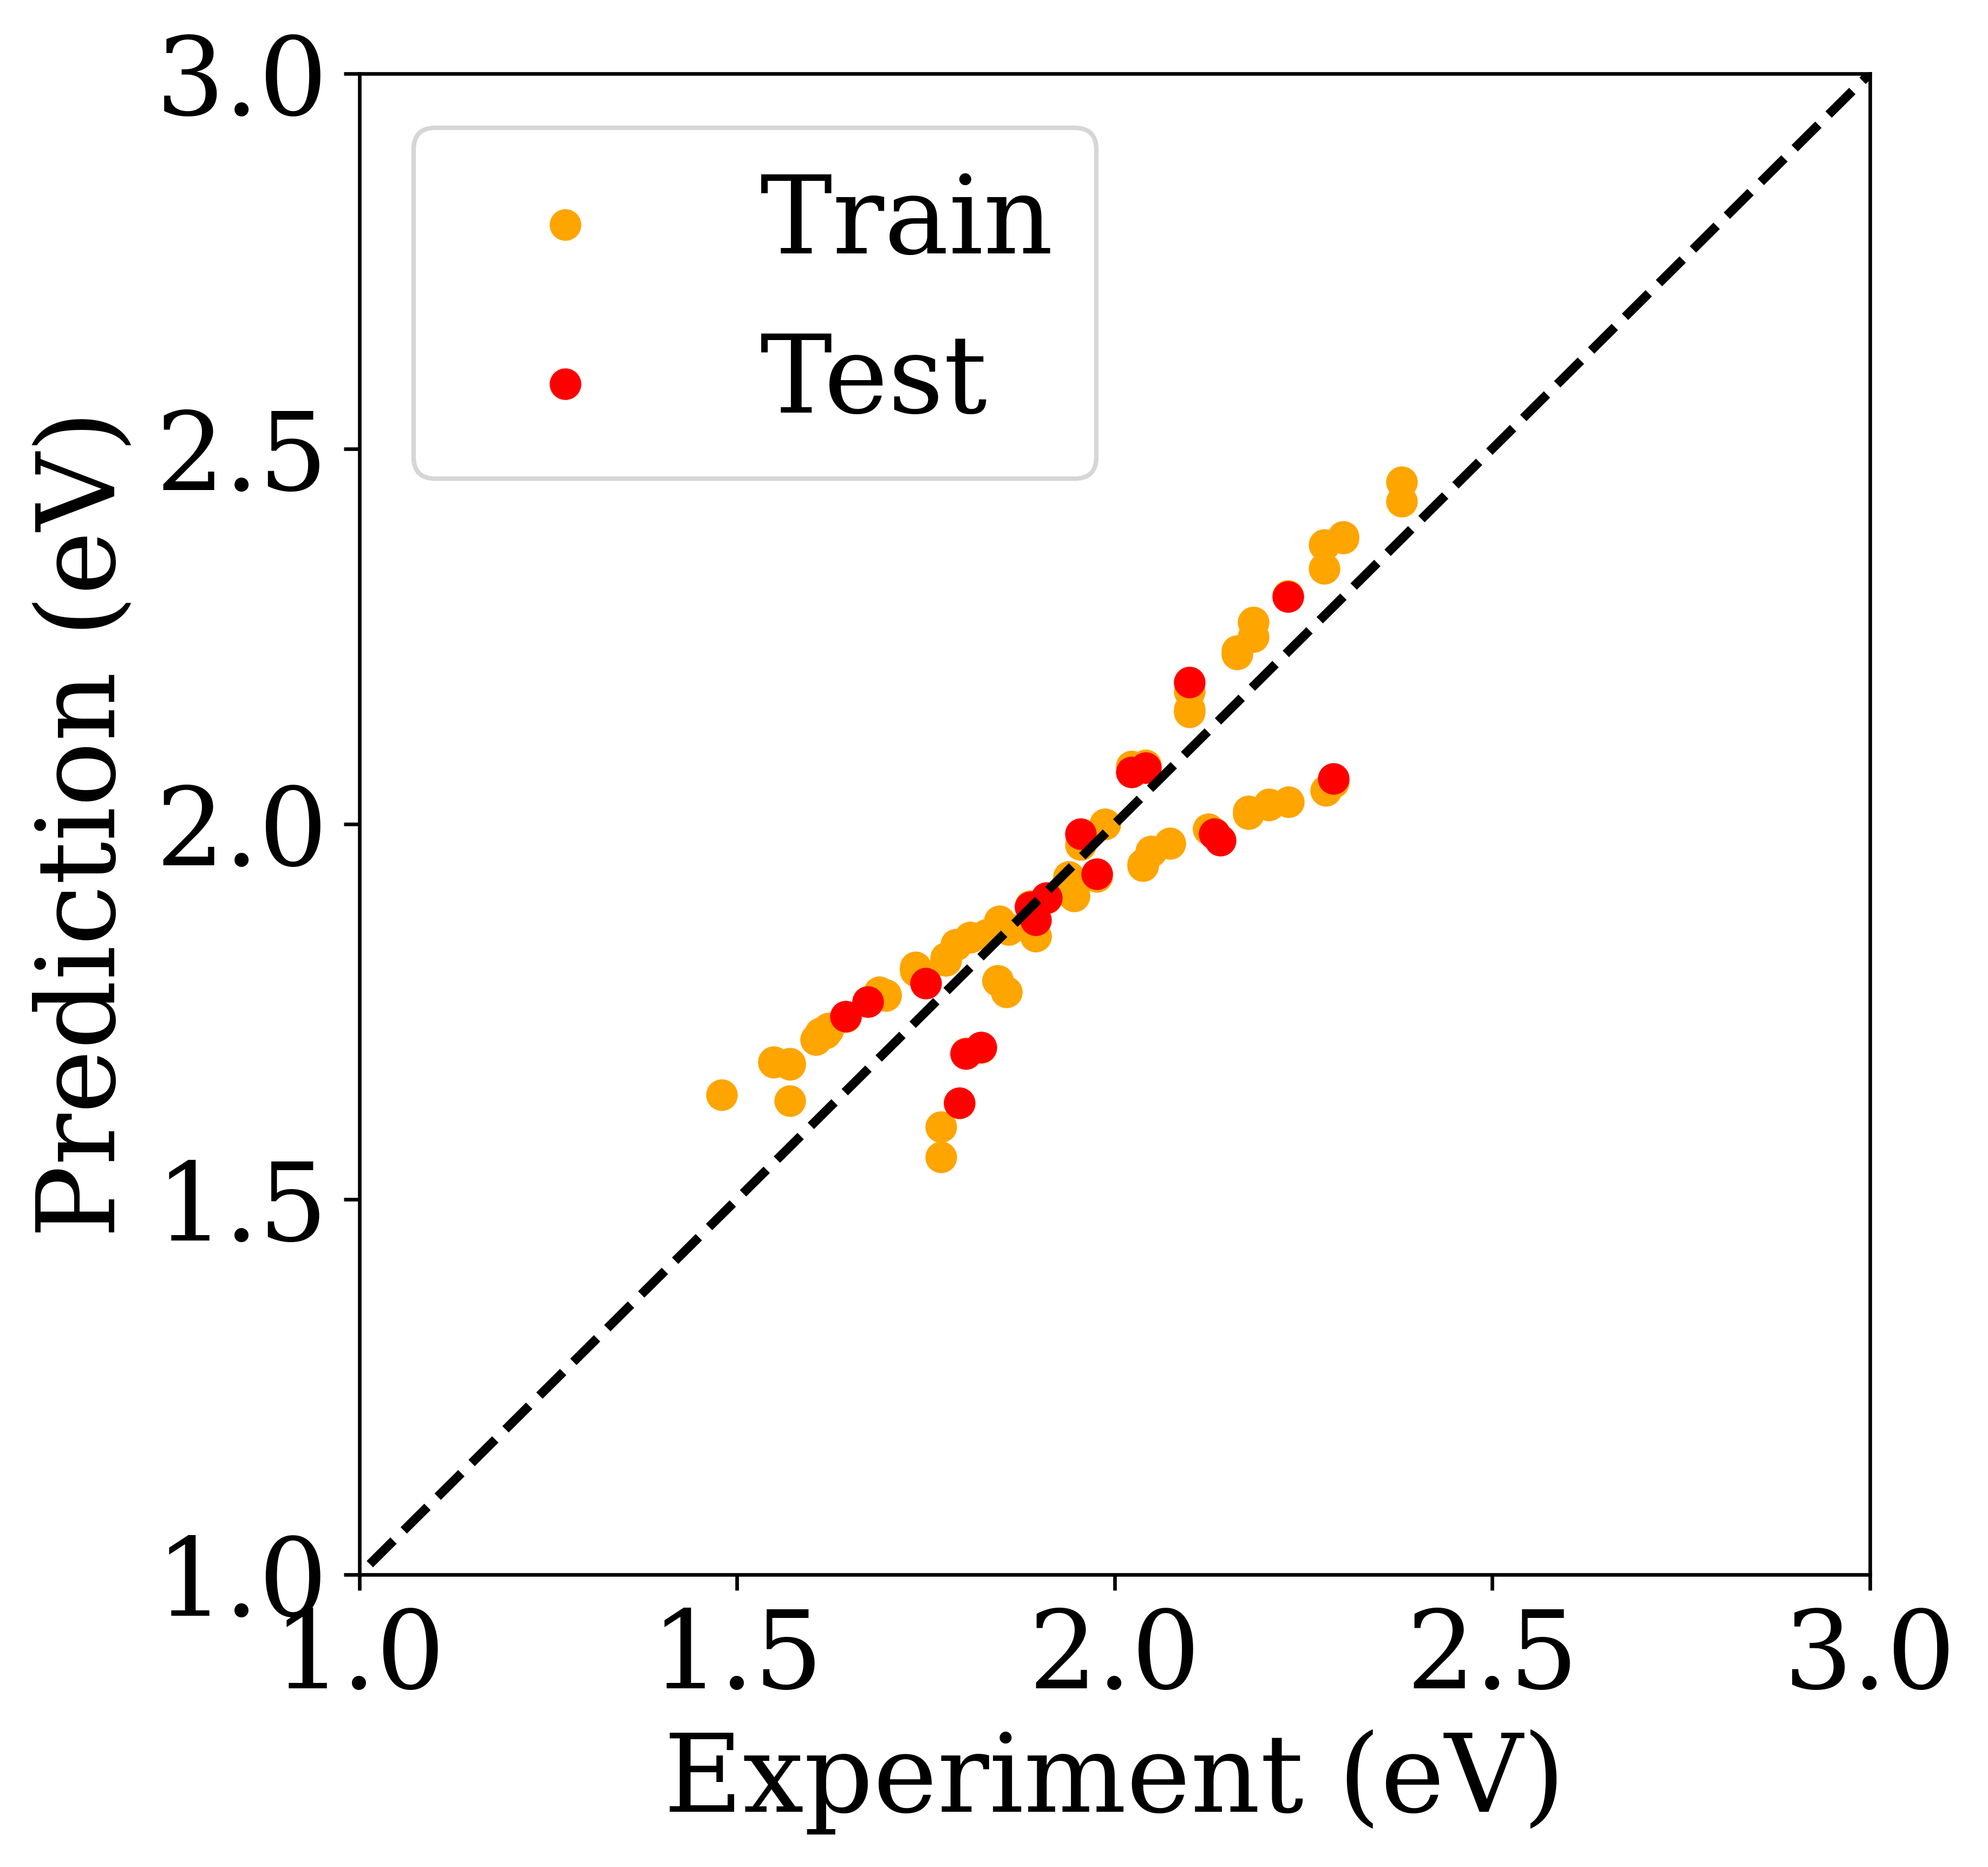

In [33]:
import numpy as np
import matplotlib.pyplot as plt   

plt.rcParams['font.family'] = 'DejaVu Serif'  
# 绘制图像
fig = plt.figure(figsize=(6,6),dpi = 600)
plt.scatter(bandgaps_train, predictions_train_,c='orange',label = 'Train')
plt.scatter(bandgaps_test, predictions_test_,c='red',label = 'Test')
plt.plot(np.linspace(-1,6,100),np.linspace(-1,6,100),linewidth=2,linestyle="--",color="black")
plt.xlim((1,3))
plt.ylim((1,3))
plt.xticks(np.arange(1.0, 3.1, 0.5))  # 从1.0到3.0，步长为0.5  
plt.yticks(np.arange(1.0, 3.1, 0.5))  # 从1.0到3.0，步长为0.5 
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.xlabel("Experiment (eV)",fontsize=24)
plt.ylabel("Prediction (eV)",fontsize=24)

plt.legend(loc='upper left', fontsize=24)  # 设置图例的位置和字体大小    



# 在图上添加均方根误差和R²
plt.text(1.22, 2.5, 'R²: {:.2f}'.format(r2_test), fontsize=18)
#plt.text(1.22, 2.4, 'MAE: {:.4f}'.format(mae_test), fontsize=18)
# 在图上添加算法名称
#plt.text(2.5, 1.3, 'Megnet', fontsize=18)
plt.savefig('./photo/Megnet_realbandgap2.png',dpi=600, bbox_inches='tight')

plt.show()
plt.close()

In [34]:
!nvidia-smi

Mon Jan  1 15:36:12 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.12             Driver Version: 535.104.12   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla V100-SXM2-32GB           On  | 00000000:00:08.0 Off |                    0 |
| N/A   31C    P0              35W / 300W |  31478MiB / 32768MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
# 假设 bandgaps_train, predictions_train_, bandgaps_test, predictions_test_ 是已经定义好的数据  
  
# 创建列表来分别存储训练数据和测试数据  
train_data = list(zip(bandgaps_train, predictions_train_))  
test_data = list(zip(bandgaps_test, predictions_test_))  
  
# 如果你想要将这些数据保存到Pandas DataFrame中，并最终保存为CSV文件，可以这样做：  
import pandas as pd  
  
# 将列表转换为DataFrame  
train_df = pd.DataFrame(train_data, columns=['Bandgaps', 'Predictions'])  
test_df = pd.DataFrame(test_data, columns=['Bandgaps', 'Predictions'])  
  
# 将DataFrame保存为CSV文件  
train_df.to_csv('train_data_re.csv', index=False)  
test_df.to_csv('test_data.csv', index=False)  
  
# 现在你有了两个CSV文件，分别包含训练数据和测试数据

In [1]:
import pandas as pd
dd1 = pd.read_csv('./excel/train_data_realbandgap.csv')
dd1

,Bandgaps,Predictions
0,1.808519,1.848804
1,1.672963,1.763541
2,1.946667,1.904537
3,2.280000,2.044670
4,1.794097,1.628235
...,...,...
85,2.161875,2.226639
86,1.808519,1.849362
87,2.131852,1.987838
88,1.736667,1.808317


In [2]:
bandgaps_train = dd1['Bandgaps'].tolist()
bandgaps_train

[1.8085185185185184,
 1.672962962962963,
 1.9466666666666663,
 2.28,
 1.7940972222222222,
 2.1241666666666665,
 2.048125,
 1.688125,
 2.0729629629629627,
 1.789791666666667,
 1.48,
 1.6966666666666663,
 1.6207407407407408,
 1.6174074074074074,
 2.161875,
 2.23,
 2.29,
 1.7762962962962965,
 1.8450617283950617,
 1.789791666666667,
 1.57,
 2.229722222222222,
 1.9875000000000005,
 1.61,
 2.1774074074074075,
 1.83,
 2.0374074074074078,
 2.1774074074074075,
 1.7366666666666668,
 2.2776543209876543,
 1.8596296296296293,
 1.8450617283950617,
 1.7366666666666668,
 1.9466666666666663,
 2.38,
 2.1241666666666665,
 1.8475,
 1.7762962962962965,
 1.895555555555556,
 1.954691358024692,
 2.0729629629629627,
 1.895555555555556,
 2.040763888888889,
 2.098888888888889,
 1.9766666666666663,
 1.8230555555555557,
 1.856875,
 1.77,
 2.0374074074074078,
 1.9390972222222225,
 2.098888888888889,
 2.1839506172839505,
 1.5485185185185182,
 1.9766666666666663,
 2.2047916666666665,
 2.2776543209876543,
 2.38,
 1.61

In [3]:
predictions_train_ = dd1['Predictions'].tolist()

In [4]:
dd2 = pd.read_csv('./excel/test_data_realbandgap.csv')
dd2

,Bandgaps,Predictions
0,2.098889,2.189054
1,2.290000,2.060731
2,1.895556,1.872297
3,1.888519,1.889860
4,1.823056,1.702342
5,2.022469,2.069403
6,1.803210,1.693710
7,1.954691,1.986835
8,1.976667,1.933578
9,1.794097,1.628610


In [5]:
bandgaps_test = dd2['Bandgaps'].tolist()
predictions_test = dd2['Predictions'].tolist()

In [8]:
# 计算均方根误差、平均绝对误差和R²,# 计算MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  
import numpy as np
rmse_test = np.sqrt(mean_squared_error(bandgaps_test, predictions_test))
mae_test = mean_absolute_error(bandgaps_test, predictions_test)
r2_test = r2_score(bandgaps_test, predictions_test)

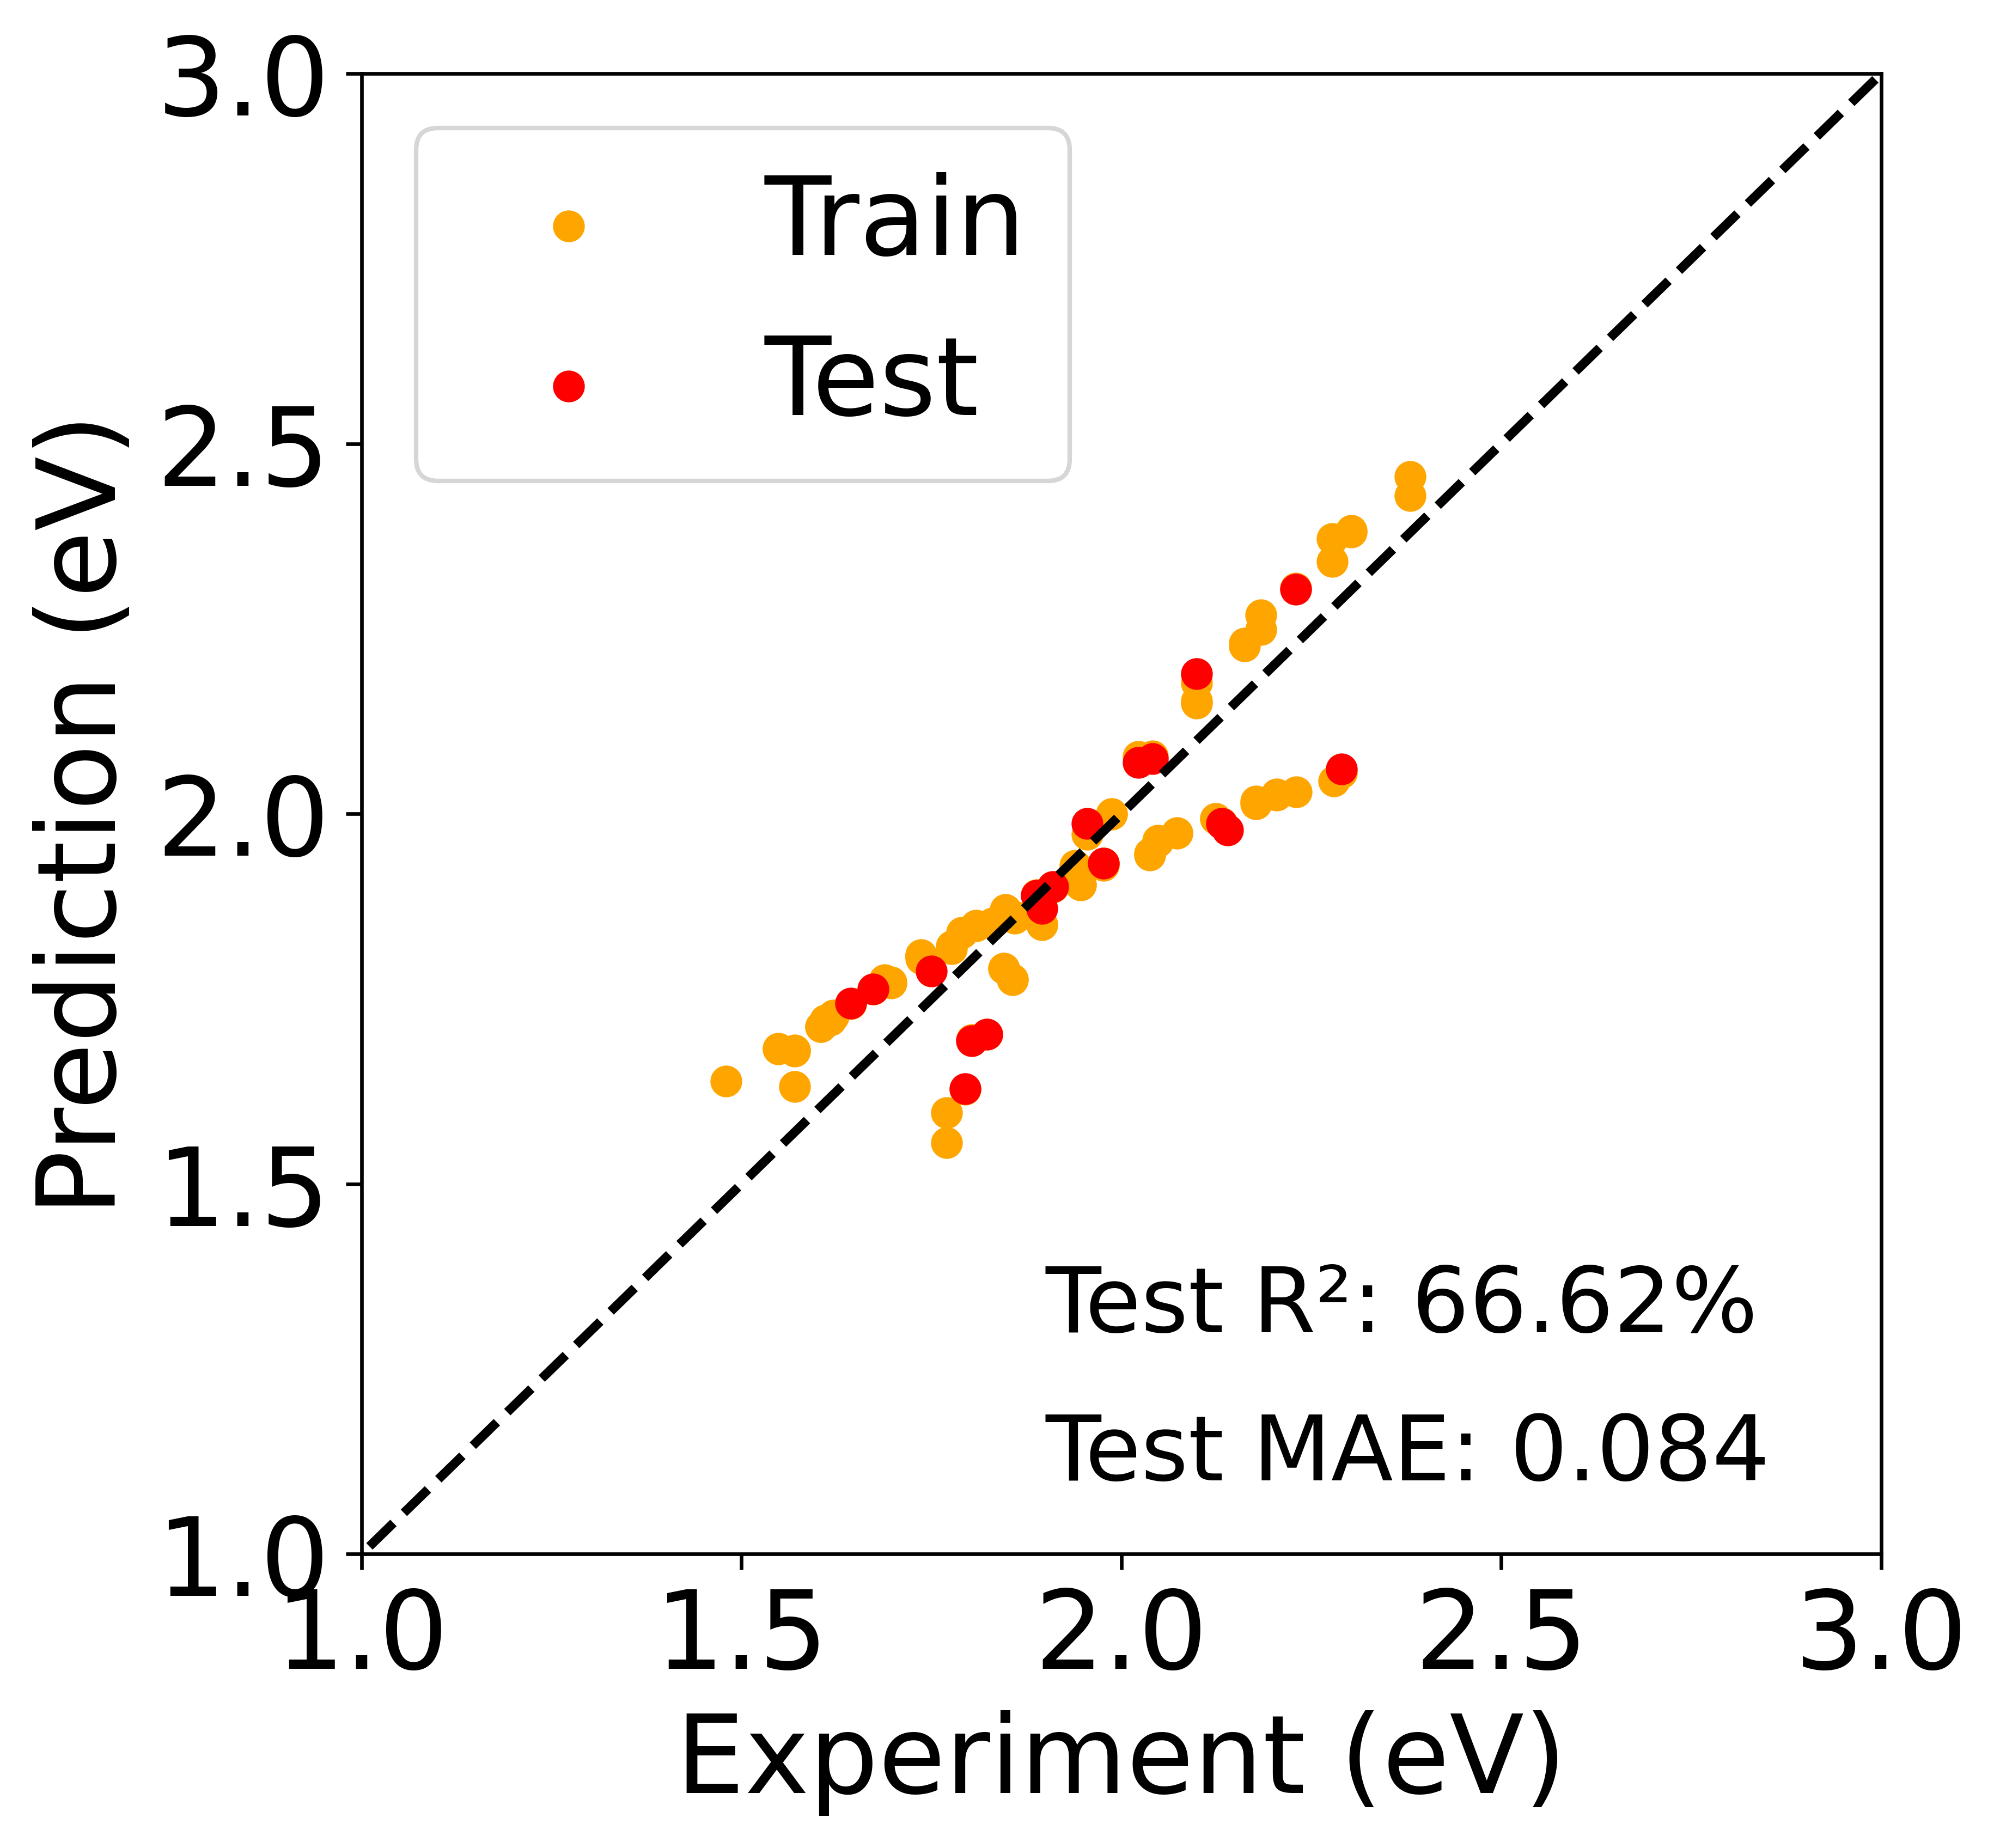

In [9]:
import numpy as np
import matplotlib.pyplot as plt   

#plt.rcParams['font.family'] = 'DejaVu Serif' 
plt.rcParams['font.family'] = 'DejaVu Sans'


# 绘制图像
fig = plt.figure(figsize=(6,6),dpi = 600)
plt.scatter(bandgaps_train, predictions_train_,c='orange',label = 'Train')
plt.scatter(bandgaps_test, predictions_test,c='red',label = 'Test')
plt.plot(np.linspace(-1,6,100),np.linspace(-1,6,100),linewidth=2,linestyle="--",color="black")
plt.xlim((1,3))
plt.ylim((1,3))
plt.xticks(np.arange(1.0, 3.1, 0.5))  # 从1.0到3.0，步长为0.5  
plt.yticks(np.arange(1.0, 3.1, 0.5))  # 从1.0到3.0，步长为0.5 
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.xlabel("Experiment (eV)",fontsize=24)
plt.ylabel("Prediction (eV)",fontsize=24)

plt.legend(loc='upper left', fontsize=24)  # 设置图例的位置和字体大小    

plt.text(1.9, 1.3, 'Test R²: {:.2f}%'.format((r2_test) * 100), fontsize=20)
#plt.text(2.2, 1.4, 'Test RMSE: {:.3f}'.format(rmse0), fontsize=20)  # 修改这里，去掉fontweight  
plt.text(1.9, 1.1, 'Test MAE: {:.3f}'.format(mae_test), fontsize=20)  # 修改这里，去掉fontweight  


# 在图上添加均方根误差和R²
#plt.text(1.22, 2.5, 'R²: {:.2f}'.format(r2_test), fontsize=18)
#plt.text(1.22, 2.4, 'RMSE: {:.4f}'.format(rmse_test), fontsize=18)
# 在图上添加算法名称
#plt.text(2.5, 1.3, 'Megnet', fontsize=18)
#plt.savefig('./photo/Megnet_realbandgap2.png',dpi=600, bbox_inches='tight')
plt.savefig('./photo/Megnet_realbandgap2.png',dpi=600, bbox_inches='tight')

plt.show()
plt.close()